In [84]:
import pandas as pd

# Anzeigeoptionen anpassen
pd.set_option('display.max_rows', None)    # zeigt alle Zeilen
pd.set_option('display.max_columns', None) # zeigt alle Spalten
pd.set_option('display.width', None)       # keine Begrenzung der Zeilenbreite
pd.set_option('display.max_colwidth', None)  # keine Begrenzung der Spaltenbreite


In [85]:
df_extended = pd.read_csv('Data/Speed_Dating_Data.csv', encoding='latin1')
df = pd.read_csv('data/flat-ui__data-Thu Jun 19 2025.csv', encoding='latin1')

In [86]:
df_extended.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Das ist um nacher noch die Wave 6-9 zu fixen

In [87]:
import numpy as np

# Variante A: mit einem kleinen Helfer, der in-place modifiziert und das DF zurückgibt
def multiply_wave_cols(df):
    # Maske für Zeilen 6–9
    mask = df['wave'].between(6, 9)
    # Spaltenauswahl: alle, die auf '_1' enden
    cols = df.columns[df.columns.str.endswith('_1')]
    # in-place Multiplikation
    df.loc[mask, cols] *= 10
    return df


## Fitting Test XGB RF LM

In [88]:
from sklearn.model_selection import train_test_split

# Wave 6-9 entfernen da die Skala nicht passt
df_extended = df_extended[(df_extended['wave'] >= 6) & (df_extended['wave'] >= 9)]

#df_extended = df_extended.loc[:, ~df_extended.columns.str.endswith(('_2', '_3'))]

# Spalten entfernen da sie 'Match' determinieren
df_extended = df_extended.drop(columns=['iid', 'id', 'idg', 'pid', "dec", "dec_o", "like", "like_o"], errors='ignore')

# Entferne jede Spalte die mehr als 5% fehlende werte hat 
threshold = 0.05 * len(df_extended)
cols_to_drop = df_extended.columns[df_extended.isnull().sum() >= threshold]
print("Spalten, die gelöscht werden (mehr als 5% fehlende Werte):")
print(cols_to_drop.tolist())
df_extended = df_extended.loc[:, df_extended.isnull().sum() < threshold]

# Train Test Split
X = df_extended.drop(["match", ], axis=1)
y = df_extended["match"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Spalten, die gelöscht werden (mehr als 5% fehlende Werte):
['amb_o', 'shar_o', 'met_o', 'undergra', 'mn_sat', 'tuition', 'zipcode', 'income', 'expnum', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'amb', 'shar', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'satis_2', 'length', 'numdat_2', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3'

In [91]:
# Zeig mir alle nunique Werte von den Object spalten
object_columns = df_extended.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"Spalte: {col}, Anzahl der eindeutigen Werte: {df_extended[col].nunique()}")
    print("\n")

Spalte: field, Anzahl der eindeutigen Werte: 193


Spalte: from, Anzahl der eindeutigen Werte: 201


Spalte: career, Anzahl der eindeutigen Werte: 265




In [94]:
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline       import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVC
from xgboost                import XGBClassifier
from sklearn.linear_model   import LogisticRegression
from sklearn.ensemble       import RandomForestClassifier

# Numerische und kategoriale Features ermitteln (unverändert)
numeric_features = X.select_dtypes(include=["number"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Transformer für numerische und kategoriale Daten definieren (unverändert)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),      # fehlende Werte durch Median ersetzen
    ("scaler", StandardScaler())                        # Standardisierung
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # fehlende Werte durch häufigsten Wert ersetzen
    ("onehot", TargetEncoder(handle_unknown="error"))     # One-Hot-Encoding, unbekannte Kategorien ignorieren
])

# ColumnTransformer zum Anwenden auf alle entsprechenden Spalten (unverändert)
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

models = [
    ("LogisticRegression", LogisticRegression(max_iter=1000, random_state=42)),
    ("RandomForest",       RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGBoost",            XGBClassifier(eval_metric="logloss", random_state=42)),
    ("KNN",                KNeighborsClassifier(n_neighbors=10)),
    ("SVM",                SVC(probability=True, random_state=42))
]

for name, clf in models:
    pipe = Pipeline([
        ("preprocessor", preprocessor),   # Dein ColumnTransformer
        ("classifier",   clf)
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="roc_auc_ovo_weighted")
    print(f"{name:20s}: {scores.mean():.3f} ± {scores.std():.3f}")

LogisticRegression  : 0.840 ± 0.010
RandomForest        : 0.808 ± 0.018
XGBoost             : 0.831 ± 0.014
KNN                 : 0.691 ± 0.020
SVM                 : 0.845 ± 0.014


## RF Model/Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Numerische und kategoriale Features ermitteln (unverändert)
numeric_features = X.select_dtypes(include=["number"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Transformer für numerische und kategoriale Daten definieren (unverändert)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),      # fehlende Werte durch Median ersetzen
    ("scaler", StandardScaler())                        # Standardisierung
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # fehlende Werte durch häufigsten Wert ersetzen
    ("onehot", OneHotEncoder(handle_unknown="ignore"))     # One-Hot-Encoding, unbekannte Kategorien ignorieren
])

# ColumnTransformer zum Anwenden auf alle entsprechenden Spalten (unverändert)
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# End-to-End-Pipeline mit RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=10000, random_state=42))
])


# Training und Bewertung auf den Trainings- und Testdaten
model_pipeline.fit(X_train, y_train)
preds = model_pipeline.predict(X_test)
y_probs = model_pipeline.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)

# Ermittlung der Feature Importances:
# Zuerst holen wir uns die Feature-Namen nach der Transformation.
# Für numerische Features bleiben sie unverändert.
# Für kategoriale Features rufen wir die Namen der OneHotEncoder-Spalten ab.
categorical_feature_names = list(model_pipeline.named_steps["preprocessor"].named_transformers_["cat"]["onehot"].get_feature_names_out(categorical_features))
all_feature_names = numeric_features + categorical_feature_names

# Abrufen der Feature Importances aus dem RandomForestClassifier
importances = model_pipeline.named_steps["classifier"].feature_importances_



AUC: 0.8373796379148306


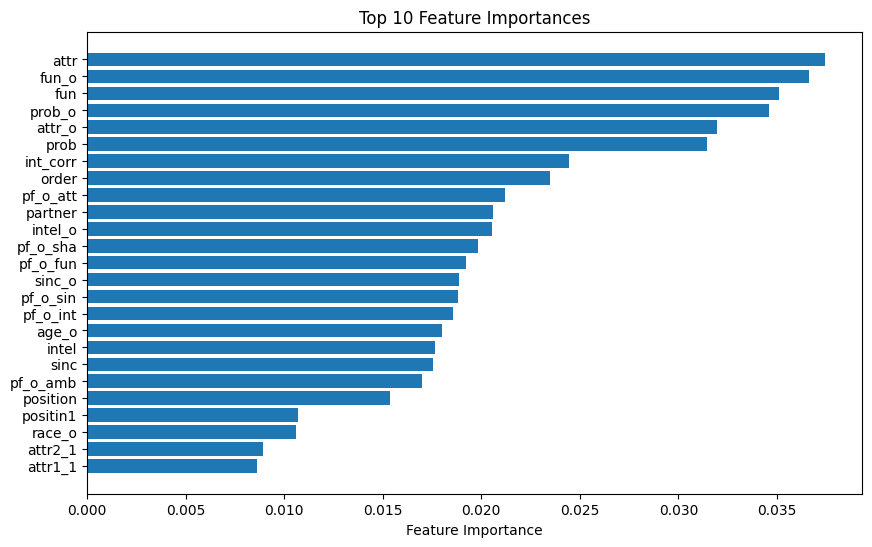

In [ ]:
import matplotlib.pyplot as plt

# Sortiere die Feature-Importances und zugehörigen Feature-Namen
sorted_idx = importances.argsort()
sorted_feature_names = [all_feature_names[i] for i in sorted_idx]
sorted_importances = importances[sorted_idx]

# Wähle die Top 10 Features aus (höchste Importances)
top_n = 25
top_feature_names = sorted_feature_names[-top_n:]
top_importances = sorted_importances[-top_n:]

plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_importances)
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances")
plt.show()
